In [8]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import os
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display, Image

In [9]:
labels = os.listdir('./dataset/train/')
labels

['dandelion', 'rose', 'sunflower']


 DANDELION


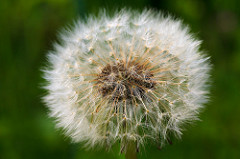

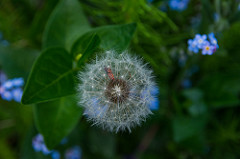

there are  100  images in  dandelion class

 ROSE


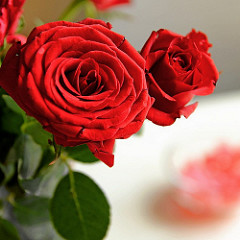

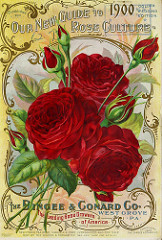

there are  100  images in  rose class

 SUNFLOWER


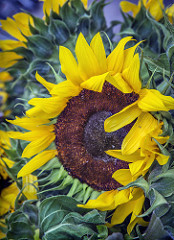

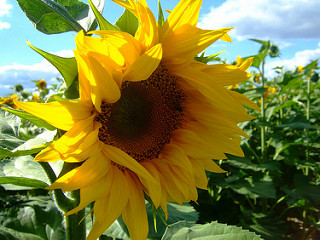

there are  100  images in  sunflower class


In [10]:
num = []

for i in labels:
  path = './dataset/train/{0}/'.format(i)
  folder_data = os.listdir(path)
  k=0
  print('\n', i.upper())
  for j in folder_data:
    if(k<2):
      display(Image(path+j))
    k=k+1
  num.append(k)
  print('there are ', k,' images in ', i, 'class')

In [22]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

tg = datagen.flow_from_directory(directory='./dataset/train/', 
                                 target_size=(320,240), classes=labels, 
                                 batch_size=32, subset='training')
vg = datagen.flow_from_directory(directory='./dataset/train/', 
                                 target_size=(320,240), classes=labels, 
                                 batch_size=32, subset='validation')

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [26]:
# building model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (320,240,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [27]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit_generator(generator=tg, steps_per_epoch=len(tg), epochs=50, validation_data=vg, validation_steps=len(vg))

Epoch 1/50
8/8 [==============================] - 9s 1s/step - loss: 40.6121 - accuracy: 0.3583 - val_loss: 4.0396 - val_accuracy: 0.5333
Epoch 2/50
8/8 [==============================] - 9s 1s/step - loss: 11.8451 - accuracy: 0.5875 - val_loss: 5.9680 - val_accuracy: 0.5500
Epoch 3/50
8/8 [==============================] - 10s 1s/step - loss: 3.8899 - accuracy: 0.6125 - val_loss: 2.8229 - val_accuracy: 0.6000
Epoch 4/50
8/8 [==============================] - 11s 1s/step - loss: 1.0819 - accuracy: 0.7625 - val_loss: 0.8402 - val_accuracy: 0.7667
Epoch 5/50
8/8 [==============================] - 9s 1s/step - loss: 0.4656 - accuracy: 0.8292 - val_loss: 0.8715 - val_accuracy: 0.6833
Epoch 6/50
8/8 [==============================] - 9s 1s/step - loss: 0.2639 - accuracy: 0.8958 - val_loss: 0.6359 - val_accuracy: 0.7333
Epoch 7/50
8/8 [==============================] - 10s 1s/step - loss: 0.1355 - accuracy: 0.9708 - val_loss: 0.6802 - val_accuracy: 0.7667
Epoch 8/50
8/8 [====================

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'upper left')

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper left')